 <img style="width:300px; heigth=300px;" src="tt.jpg">
 
 <h1 > <p style="color:blue; text-align:center;"> Projet : Fouille de Données </p></h1>

 <h2> <p style="color:blue; text-align:center;">Thème: Classification des Tweets</p></h2>
  <h3> <p style="color:blue; text-align:center;">Réalisé : Said Boukhrissa </p></h3>
  
  


<h2> <p style="color:red;">Objectifs : <img style="width:100px; heigth=100px;  " src="oo.jpg"> </p></h2> 

* Maitriser l’API de twitter pour l’extraction des tweets
1. Maitriser la partie NLP (natural language processing) avec NLTK en Python
2. Appliquer les principes de nettoyage des données
3. Classer les tweets : regrouper ensemble les tweets qui sont similaires. C’est une étape qui peut être considérée comme une étape 

<h2> <p style="color:red;">Les tâches à réaliser :</p></h2> 

<p style="font-weight:bold;">i. Prétraitement des tweets </p>

Dans cette étape, l’objectif est d’éliminer le texte inutile des tweets tels que les #, les noms des
utilisateurs, les url, …

<p style="font-weight:bold;">ii. Traitement des tweets : NLP (Natural LanguageProcessing) </p> </p>

On doit procéder à l’analyse du tweet en respectant les différentes étapes du NLP (Natural
LanguageProcessing). La bibliothèque à utiliser est NLTK en Python.

<p style="font-weight:bold;">iii. Classification des tweets </p>

Etant donné un ensemble de tweets, l’objectif est de les résumer sous formes de groupes de sorte à
ce que les Tweets qui sont dans le même groupe soient similaires. Ainsi, l’utilisateur pourra par la
suite lire juste un Tweet de chaque groupe (le Tweet qui est le centroïde de groupes).

In [26]:
!pip install tweepy
!pip install pandas

 <h3 style="color:red ;"> Les Imports ! </h3>

In [1]:
import pandas as pd 
import tweepy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


<h3> DataSets!</h3>

<h4> La fonction "recuperer_tweets" à pour role de consommer l'API et sauvegrder les tweets dans "Datasettweets" </h4>


In [30]:
def recuperer_tweets(words, date_since, numtweet): 
      
    # Creating DataFrame using pandas 
    db = pd.DataFrame(columns=['username', 'description', 'location', 'following', 
                               'followers', 'totaltweets', 'retweetcount', 'text', 'hashtags']) 
      
    # We are using .Cursor() to search through twitter for the required tweets. 
    # The number of tweets can be restricted using .items(number of tweets) 
    tweets = tweepy.Cursor(api.search, q=words, lang="en", 
                           since=date_since, tweet_mode='extended').items(numtweet) 
     
    # .Cursor() returns an iterable object. Each item in  
    # the iterator has various attributes that you can access to  
    # get information about each tweet 
    list_tweets = [tweet for tweet in tweets] 
      
    # Counter to maintain Tweet Count 
    i = 1  
      
    # we will iterate over each tweet in the list for extracting information about each tweet 
    for tweet in list_tweets: 
        username = tweet.user.screen_name 
        description = tweet.user.description 
        location = tweet.user.location 
        following = tweet.user.friends_count 
        followers = tweet.user.followers_count 
        totaltweets = tweet.user.statuses_count 
        retweetcount = tweet.retweet_count 
        hashtags = tweet.entities['hashtags'] 
          
        # Retweets can be distinguished by a retweeted_status attribute, 
        # in case it is an invalid reference, except block will be executed 
        try: 
            text = tweet.retweeted_status.full_text 
        except AttributeError: 
            text = tweet.full_text 
        hashtext = list() 
        for j in range(0, len(hashtags)): 
            hashtext.append(hashtags[j]['text']) 
          
        # Here we are appending all the extracted information in the DataFrame 
        ith_tweet = [username, description, location, following, 
                     followers, totaltweets, retweetcount, text, hashtext] 
        db.loc[len(db)] = ith_tweet 
          
        # Function call to print tweet data on screen 
        printtweetdata(i, ith_tweet) 
        i = i+1
    filename = 'Datasettweets.csv'
      
    # we will save our database as a CSV file. 
    db.to_csv(filename) 
  
  
if __name__ == '__main__': 
      
    # Enter your own credentials obtained  
    # from your developer account 
    consumer_key = "dQAqgwCB9saD67dEOzji0PQuE"
    consumer_secret = "BQbsZ6SpG91ESkaoqiug65L29oHHUqPGB2dTmm7B910EEPuqyP"
    access_key = "1324987221087301632-ebJRIlmfvMx1UeVm45I1HZA34wPwt8"
    access_secret = "j7zGNCLz9ZPB47wVXVC0Ripg6RNpwzG2dzTwNXOoJUsTI"
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret) 
    auth.set_access_token(access_key, access_secret) 
    api = tweepy.API(auth,wait_on_rate_limit=True) 
      
    # Enter Hashtag and initial date 
    print("Enter Twitter HashTag to search for") 
    words = input() 
    print("Enter Date since The Tweets are required in yyyy-mm--dd") 
    date_since = input() 
      
    # number of tweets you want to extract in one run 
    numtweet =1
    recuperer_tweets (words, date_since, numtweet) 
    print('charging tweets has completed!') 

Enter Twitter HashTag to search for
sport
Enter Date since The Tweets are required in yyyy-mm--dd
2020-2-2

Tweet 1:
Username:KirstiMiller30
Description:She/Her World Aquathon Champion & Dual-International-Hall-Of-Fame-Athlete, Educator within sport regarding diversity, former Prison Governor & proud Nan of 7❤️
Location:BROKEN Hill 
Following Count:4975
Follower Count:2616
Total Tweets:76171
Retweet Count:0
Tweet Text:@brfootball The performance gap between genders is massively conflated by non-biological factors such as participation &amp; coaching access, sociocultural factors, negative attitudes about women in strength sports &amp; inequalities at every level of sport &amp; society.
https://t.co/LI9vh5g4LG
Hashtags Used:[]
charging tweets has completed!


<h4>Fonction pour affichier les tweets </h4>

In [69]:
# function to display data of each tweet 
def printtweetdata(n, ith_tweet): 
    print() 
    print(f"Tweet {n}:") 
    print(f"Username:{ith_tweet[0]}") 
    print(f"Description:{ith_tweet[1]}") 
    print(f"Location:{ith_tweet[2]}") 
    print(f"Following Count:{ith_tweet[3]}") 
    print(f"Follower Count:{ith_tweet[4]}") 
    print(f"Total Tweets:{ith_tweet[5]}") 
    print(f"Retweet Count:{ith_tweet[6]}") 
    print(f"Tweet Text:{ith_tweet[7]}") 
    print(f"Hashtags Used:{ith_tweet[8]}") 

<h4> Fussionner deux datasets ! </h4> 

In [70]:
df_1= pd.read_csv('Datasettweets1.csv')
df=pd.read_csv('Datasettweets.csv')
df_2=pd.read_csv('tweets.csv')
df_final1=pd.concat([df, df_1], ignore_index=True)
df_final=pd.concat([df_2, df_final1], ignore_index=True)
print(df_final.shape)
df_final.head()

(7985, 10)


,Unnamed: 0,username,description,location,following,followers,totaltweets,retweetcount,text,hashtags
0,0,koki5_3,Be unique the world is full of copies\nكن مميز...,NaN,5024,5524,504401,9,Gazzetta dello Sport: Ibrahimovic is also at r...,[]
1,1,DANIELKT9,NaN,NaN,1389,580,3305,1,India dismissed Australia for 191 in 72 overs ...,[]
2,2,RmSalih,Editor of British Muslim news site 5Pillars (h...,London,1778,6310,19991,4,UFC World Lightweight Champion Khabib Nurmagom...,[]
3,3,DailyDogTwit,#Yes #WeLoveDogs #dog #love #pet #puppy #pug #...,"London, England",954,774,250129,0,LED Light up Trainers Kids Unisex 7 Colors Lum...,[]
4,4,55kilograms,NaN,NaN,167,84,2525,8,"A huge thank you to @uk_sport, @DCMS and @TNLU...",[]


In [71]:
print(df.shape)
print(df_2.shape)
print(df_1.shape)

(2985, 10)
(3000, 10)
(2000, 10)


<h3 style="color:red;"> Cleaning !</h3>

<h4> Supprimer les propriétes inutiles </h4>

In [74]:
to_drop = ['Unnamed: 0',
           'username',
           'description',
           'location',
           'following',
           'followers',
           'totaltweets']
#Eliminer les colonnes dans la liste de to_drop du dataframe df
df_final.drop(to_drop, inplace=True, axis=1)
#Afficherle résultat
df_final.head()



,retweetcount,text,hashtags
0,9,Gazzetta dello Sport: Ibrahimovic is also at r...,[]
1,1,India dismissed Australia for 191 in 72 overs ...,[]
2,4,UFC World Lightweight Champion Khabib Nurmagom...,[]
3,0,LED Light up Trainers Kids Unisex 7 Colors Lum...,[]
4,8,"A huge thank you to @uk_sport, @DCMS and @TNLU...",[]


<h4>Supprimer les ponctuations </h4>

In [41]:
import string , re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

string.punctuation


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [75]:
def remove_punct(text_t):
    text_t = "".join([char for char in text_t if char not in string.punctuation])
    text_t = re.sub('[0-9]+', '', text_t)
    
    
   
    
    
    return text_t

df_final['Tweet_punct'] = df_final['text'].apply(lambda x: remove_punct(x))
df_final.head(10)

,retweetcount,text,hashtags,Tweet_punct
0,9,Gazzetta dello Sport: Ibrahimovic is also at r...,[],Gazzetta dello Sport Ibrahimovic is also at ri...
1,1,India dismissed Australia for 191 in 72 overs ...,[],India dismissed Australia for in overs on Fr...
2,4,UFC World Lightweight Champion Khabib Nurmagom...,[],UFC World Lightweight Champion Khabib Nurmagom...
3,0,LED Light up Trainers Kids Unisex 7 Colors Lum...,[],LED Light up Trainers Kids Unisex Colors Lumi...
4,8,"A huge thank you to @uk_sport, @DCMS and @TNLU...",[],A huge thank you to uksport DCMS and TNLUK for...
5,10,WADA’s Athlete Committee is disappointed with ...,[],WADA’s Athlete Committee is disappointed with ...
6,0,ICYMI:Ugly Sweaters \nMy ugly sweater project ...,[],ICYMIUgly Sweaters \nMy ugly sweater project o...
7,2,Column: My time was thanks to the people @Trib...,[],Column My time was thanks to the people TribCh...
8,20,Let's talk about periods. \n\n#theAIS Female P...,['theAIS'],Lets talk about periods \n\ntheAIS Female Perf...
9,0,Moukoko becomes youngest Bundesliga scorer but...,[],Moukoko becomes youngest Bundesliga scorer but...


<h4> Supprimer les mots inutiles et faire tokenization </h4>

In [76]:

df_final['Tweet_SanS_L_Mot'] = df_final['Tweet_punct'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
def tokenization(text):
    text = re.split(' ', text)
    return text

df_final['Tweet_tokenized'] = df_final['Tweet_SanS_L_Mot'].apply(lambda x: tokenization(x.lower()))

df_final.head()


,retweetcount,text,hashtags,Tweet_punct,Tweet_SanS_L_Mot,Tweet_tokenized
0,9,Gazzetta dello Sport: Ibrahimovic is also at r...,[],Gazzetta dello Sport Ibrahimovic is also at ri...,Gazzetta dello Sport Ibrahimovic also risk mis...,"[gazzetta, dello, sport, ibrahimovic, also, ri..."
1,1,India dismissed Australia for 191 in 72 overs ...,[],India dismissed Australia for in overs on Fr...,India dismissed Australia overs Friday take fi...,"[india, dismissed, australia, overs, friday, t..."
2,4,UFC World Lightweight Champion Khabib Nurmagom...,[],UFC World Lightweight Champion Khabib Nurmagom...,World Lightweight Champion Khabib Nurmagomedov...,"[world, lightweight, champion, khabib, nurmago..."
3,0,LED Light up Trainers Kids Unisex 7 Colors Lum...,[],LED Light up Trainers Kids Unisex Colors Lumi...,Light Trainers Kids Unisex Colors Luminous Fla...,"[light, trainers, kids, unisex, colors, lumino..."
4,8,"A huge thank you to @uk_sport, @DCMS and @TNLU...",[],A huge thank you to uksport DCMS and TNLUK for...,huge thank uksport DCMS TNLUK todays confirmat...,"[huge, thank, uksport, dcms, tnluk, todays, co..."


In [77]:
df_final.head()

,retweetcount,text,hashtags,Tweet_punct,Tweet_SanS_L_Mot,Tweet_tokenized
0,9,Gazzetta dello Sport: Ibrahimovic is also at r...,[],Gazzetta dello Sport Ibrahimovic is also at ri...,Gazzetta dello Sport Ibrahimovic also risk mis...,"[gazzetta, dello, sport, ibrahimovic, also, ri..."
1,1,India dismissed Australia for 191 in 72 overs ...,[],India dismissed Australia for in overs on Fr...,India dismissed Australia overs Friday take fi...,"[india, dismissed, australia, overs, friday, t..."
2,4,UFC World Lightweight Champion Khabib Nurmagom...,[],UFC World Lightweight Champion Khabib Nurmagom...,World Lightweight Champion Khabib Nurmagomedov...,"[world, lightweight, champion, khabib, nurmago..."
3,0,LED Light up Trainers Kids Unisex 7 Colors Lum...,[],LED Light up Trainers Kids Unisex Colors Lumi...,Light Trainers Kids Unisex Colors Luminous Fla...,"[light, trainers, kids, unisex, colors, lumino..."
4,8,"A huge thank you to @uk_sport, @DCMS and @TNLU...",[],A huge thank you to uksport DCMS and TNLUK for...,huge thank uksport DCMS TNLUK todays confirmat...,"[huge, thank, uksport, dcms, tnluk, todays, co..."


In [45]:
!pip install nltk

In [78]:

import nltk
nltk.download('stopwords')
stopword = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SAID\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [79]:
print(stopword)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [80]:
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
df_final['Tweet_nonstopW'] =df_final['Tweet_tokenized'].apply(lambda x: remove_stopwords(x))
df_final.head()

,retweetcount,text,hashtags,Tweet_punct,Tweet_SanS_L_Mot,Tweet_tokenized,Tweet_nonstopW
0,9,Gazzetta dello Sport: Ibrahimovic is also at r...,[],Gazzetta dello Sport Ibrahimovic is also at ri...,Gazzetta dello Sport Ibrahimovic also risk mis...,"[gazzetta, dello, sport, ibrahimovic, also, ri...","[gazzetta, dello, sport, ibrahimovic, also, ri..."
1,1,India dismissed Australia for 191 in 72 overs ...,[],India dismissed Australia for in overs on Fr...,India dismissed Australia overs Friday take fi...,"[india, dismissed, australia, overs, friday, t...","[india, dismissed, australia, overs, friday, t..."
2,4,UFC World Lightweight Champion Khabib Nurmagom...,[],UFC World Lightweight Champion Khabib Nurmagom...,World Lightweight Champion Khabib Nurmagomedov...,"[world, lightweight, champion, khabib, nurmago...","[world, lightweight, champion, khabib, nurmago..."
3,0,LED Light up Trainers Kids Unisex 7 Colors Lum...,[],LED Light up Trainers Kids Unisex Colors Lumi...,Light Trainers Kids Unisex Colors Luminous Fla...,"[light, trainers, kids, unisex, colors, lumino...","[light, trainers, kids, unisex, colors, lumino..."
4,8,"A huge thank you to @uk_sport, @DCMS and @TNLU...",[],A huge thank you to uksport DCMS and TNLUK for...,huge thank uksport DCMS TNLUK todays confirmat...,"[huge, thank, uksport, dcms, tnluk, todays, co...","[huge, thank, uksport, dcms, tnluk, todays, co..."


<h4>Stem (racine) est la partie du mot à laquelle vous ajoutez des affixes flexionnels (changement / dérivation) tels que (-ed, -ize, -s, -de, mis). Ainsi, la racine d'un mot ou d'une phrase peut entraîner des mots qui ne sont pas des mots réels. Les souches sont créées en supprimant les suffixes ou préfixes utilisés avec un mot. </h4>

In [81]:
ps = nltk.PorterStemmer()
def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

df_final['Tweet_stemmed'] = df_final['Tweet_nonstopW'].apply(lambda x: stemming(x))
df_final.head()

,retweetcount,text,hashtags,Tweet_punct,Tweet_SanS_L_Mot,Tweet_tokenized,Tweet_nonstopW,Tweet_stemmed
0,9,Gazzetta dello Sport: Ibrahimovic is also at r...,[],Gazzetta dello Sport Ibrahimovic is also at ri...,Gazzetta dello Sport Ibrahimovic also risk mis...,"[gazzetta, dello, sport, ibrahimovic, also, ri...","[gazzetta, dello, sport, ibrahimovic, also, ri...","[gazzetta, dello, sport, ibrahimov, also, risk..."
1,1,India dismissed Australia for 191 in 72 overs ...,[],India dismissed Australia for in overs on Fr...,India dismissed Australia overs Friday take fi...,"[india, dismissed, australia, overs, friday, t...","[india, dismissed, australia, overs, friday, t...","[india, dismiss, australia, over, friday, take..."
2,4,UFC World Lightweight Champion Khabib Nurmagom...,[],UFC World Lightweight Champion Khabib Nurmagom...,World Lightweight Champion Khabib Nurmagomedov...,"[world, lightweight, champion, khabib, nurmago...","[world, lightweight, champion, khabib, nurmago...","[world, lightweight, champion, khabib, nurmago..."
3,0,LED Light up Trainers Kids Unisex 7 Colors Lum...,[],LED Light up Trainers Kids Unisex Colors Lumi...,Light Trainers Kids Unisex Colors Luminous Fla...,"[light, trainers, kids, unisex, colors, lumino...","[light, trainers, kids, unisex, colors, lumino...","[light, trainer, kid, unisex, color, lumin, fl..."
4,8,"A huge thank you to @uk_sport, @DCMS and @TNLU...",[],A huge thank you to uksport DCMS and TNLUK for...,huge thank uksport DCMS TNLUK todays confirmat...,"[huge, thank, uksport, dcms, tnluk, todays, co...","[huge, thank, uksport, dcms, tnluk, todays, co...","[huge, thank, uksport, dcm, tnluk, today, conf..."


<h4> La lemmatisation, contrairement au Stemming, réduit correctement les mots fléchis en s'assurant que le mot racine appartient à la langue. Dans la lemmatisation, le mot racine est appelé Lemme . Un lemme (lemme pluriel ou lemmata) est la forme canonique, la forme du dictionnaire ou la forme de citation d'un ensemble de mots.</h4>

In [82]:
nltk.download('wordnet')
wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

df_final['Tweet_lemmatized'] = df_final['Tweet_stemmed'].apply(lambda x: lemmatizer(x))
df_final.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SAID\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,retweetcount,text,hashtags,Tweet_punct,Tweet_SanS_L_Mot,Tweet_tokenized,Tweet_nonstopW,Tweet_stemmed,Tweet_lemmatized
0,9,Gazzetta dello Sport: Ibrahimovic is also at r...,[],Gazzetta dello Sport Ibrahimovic is also at ri...,Gazzetta dello Sport Ibrahimovic also risk mis...,"[gazzetta, dello, sport, ibrahimovic, also, ri...","[gazzetta, dello, sport, ibrahimovic, also, ri...","[gazzetta, dello, sport, ibrahimov, also, risk...","[gazzetta, dello, sport, ibrahimov, also, risk..."
1,1,India dismissed Australia for 191 in 72 overs ...,[],India dismissed Australia for in overs on Fr...,India dismissed Australia overs Friday take fi...,"[india, dismissed, australia, overs, friday, t...","[india, dismissed, australia, overs, friday, t...","[india, dismiss, australia, over, friday, take...","[india, dismiss, australia, over, friday, take..."
2,4,UFC World Lightweight Champion Khabib Nurmagom...,[],UFC World Lightweight Champion Khabib Nurmagom...,World Lightweight Champion Khabib Nurmagomedov...,"[world, lightweight, champion, khabib, nurmago...","[world, lightweight, champion, khabib, nurmago...","[world, lightweight, champion, khabib, nurmago...","[world, lightweight, champion, khabib, nurmago..."
3,0,LED Light up Trainers Kids Unisex 7 Colors Lum...,[],LED Light up Trainers Kids Unisex Colors Lumi...,Light Trainers Kids Unisex Colors Luminous Fla...,"[light, trainers, kids, unisex, colors, lumino...","[light, trainers, kids, unisex, colors, lumino...","[light, trainer, kid, unisex, color, lumin, fl...","[light, trainer, kid, unisex, color, lumin, fl..."
4,8,"A huge thank you to @uk_sport, @DCMS and @TNLU...",[],A huge thank you to uksport DCMS and TNLUK for...,huge thank uksport DCMS TNLUK todays confirmat...,"[huge, thank, uksport, dcms, tnluk, todays, co...","[huge, thank, uksport, dcms, tnluk, todays, co...","[huge, thank, uksport, dcm, tnluk, today, conf...","[huge, thank, uksport, dcm, tnluk, today, conf..."


<h4>Sauvegarder les cleaned tweets !</h4>

In [86]:
df_final.Tweet_lemmatized.to_csv('Tweets_cleaned.csv',index = False)




In [87]:
new_tweet_df= pd.read_csv('Tweets_cleaned.csv')
new_tweet_df.head()
print(new_tweet_df.shape)


(7985, 1)


In [88]:
print('Dataset size:',new_tweet_df.shape)
print('Columns are:',new_tweet_df.columns)

Dataset size: (7985, 1)
Columns are: Index(['Tweet_lemmatized'], dtype='object')


<h4> Vectorisation des tweets  </h4>

In [89]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X=cv.fit_transform(new_tweet_df.Tweet_lemmatized)
print(X)

  (0, 4484)	1
  (0, 2924)	1
  (0, 14669)	1
  (0, 9237)	1
  (0, 347)	1
  (0, 13537)	1
  (0, 11311)	1
  (0, 9965)	1
  (0, 4428)	1
  (0, 9666)	1
  (0, 7809)	1
  (1, 9365)	1
  (1, 3109)	1
  (1, 743)	1
  (1, 12271)	1
  (1, 4307)	1
  (1, 15198)	1
  (1, 4080)	1
  (1, 10377)	1
  (1, 10651)	1
  (1, 5153)	1
  (1, 16166)	1
  (1, 4078)	2
  (1, 4910)	1
  (1, 5296)	1
  :	:
  (7983, 3765)	1
  (7983, 4735)	1
  (7983, 10834)	1
  (7983, 5099)	1
  (7983, 12660)	1
  (7983, 14840)	1
  (7983, 13178)	1
  (7983, 15895)	1
  (7983, 2461)	2
  (7983, 11558)	1
  (7983, 3033)	1
  (7983, 5091)	1
  (7983, 5051)	1
  (7983, 3273)	1
  (7983, 11005)	1
  (7983, 7051)	1
  (7983, 8420)	1
  (7983, 7174)	1
  (7984, 15209)	1
  (7984, 3697)	1
  (7984, 11558)	1
  (7984, 16495)	1
  (7984, 9775)	1
  (7984, 9208)	1
  (7984, 6097)	1


<h3 style="color:red;"> Clustering ! </h3>

<h4> J'ai utilisé l’algorithme K-Means pour  classer  les Tweets  en k classes </h4>

In [90]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(3,30):
    print(" ********** Nombre de cluster : ************",i)
    Kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0,verbose=True)
    Kmeans.fit(X)
    wcss.append(Kmeans.inertia_)

 ********** Nombre de cluster : ************ 3
Initialization complete
Iteration 0, inertia 158467.0
Iteration 1, inertia 125754.53352107054
Iteration 2, inertia 125754.23111795822
Converged at iteration 2: center shift 0.0 within tolerance 9.37720255744027e-08
Initialization complete
Iteration 0, inertia 189343.0
Iteration 1, inertia 125472.53479046303
Iteration 2, inertia 124469.31080121013
Iteration 3, inertia 123780.96691172125
Iteration 4, inertia 123479.7363562777
Iteration 5, inertia 123476.13021805769
Iteration 6, inertia 123474.94555892942
Iteration 7, inertia 123473.64009904845
Iteration 8, inertia 123432.15177992884
Iteration 9, inertia 123426.41236847696
Iteration 10, inertia 123422.55989130055
Iteration 11, inertia 123414.8567021143
Iteration 12, inertia 123398.96128755464
Iteration 13, inertia 123336.5892022768
Iteration 14, inertia 123152.02212631331
Iteration 15, inertia 123089.41777163756
Iteration 16, inertia 123089.20426284682
Converged at iteration 16: center shift 

Iteration 0, inertia 149098.0
Iteration 1, inertia 121039.10109168645
Iteration 2, inertia 121038.59788488134
Converged at iteration 2: center shift 0.0 within tolerance 9.37720255744027e-08
Initialization complete
Iteration 0, inertia 158852.0
Iteration 1, inertia 125735.28664778617
Iteration 2, inertia 124793.32310974323
Iteration 3, inertia 124409.1963674623
Iteration 4, inertia 123438.67900363423
Iteration 5, inertia 122908.92842957204
Iteration 6, inertia 122811.66257483474
Iteration 7, inertia 122637.66652324915
Iteration 8, inertia 122627.06591913557
Iteration 9, inertia 122622.8011184107
Iteration 10, inertia 122621.98089359254
Converged at iteration 10: center shift 0.0 within tolerance 9.37720255744027e-08
Initialization complete
Iteration 0, inertia 158114.0
Iteration 1, inertia 121827.57514666805
Iteration 2, inertia 121613.56129062895
Iteration 3, inertia 121554.78469479948
Iteration 4, inertia 121484.74446326688
Iteration 5, inertia 121332.10665163145
Iteration 6, inertia

Initialization complete
Iteration 0, inertia 151265.0
Iteration 1, inertia 121611.66067243533
Iteration 2, inertia 121155.524537058
Iteration 3, inertia 120911.07550069671
Iteration 4, inertia 120858.8265655464
Iteration 5, inertia 120858.77344508766
Converged at iteration 5: center shift 0.0 within tolerance 9.37720255744027e-08
Initialization complete
Iteration 0, inertia 153799.0
Iteration 1, inertia 118683.00796598187
Iteration 2, inertia 118458.19049569205
Iteration 3, inertia 118357.46580194656
Iteration 4, inertia 118356.46342029971
Iteration 5, inertia 118356.45495088039
Converged at iteration 5: center shift 0.0 within tolerance 9.37720255744027e-08
Initialization complete
Iteration 0, inertia 166024.0
Iteration 1, inertia 123971.68428943139
Iteration 2, inertia 123971.2411726796
Converged at iteration 2: center shift 0.0 within tolerance 9.37720255744027e-08
Initialization complete
Iteration 0, inertia 157369.0
Iteration 1, inertia 121573.9060462691
Iteration 2, inertia 12107

Iteration 7, inertia 115976.1041497736
Iteration 8, inertia 115914.68574635313
Iteration 9, inertia 115910.62403934977
Iteration 10, inertia 115909.04926577272
Converged at iteration 10: center shift 0.0 within tolerance 9.37720255744027e-08
Initialization complete
Iteration 0, inertia 141065.0
Iteration 1, inertia 117520.14632539407
Iteration 2, inertia 117403.32280767277
Iteration 3, inertia 117390.63635517127
Iteration 4, inertia 117390.44991909266
Converged at iteration 4: center shift 0.0 within tolerance 9.37720255744027e-08
Initialization complete
Iteration 0, inertia 155882.0
Iteration 1, inertia 119091.1530158572
Iteration 2, inertia 118679.22568738542
Iteration 3, inertia 118417.00763896568
Iteration 4, inertia 118154.84661985477
Iteration 5, inertia 117441.82295645874
Iteration 6, inertia 115987.09526839454
Iteration 7, inertia 115439.54710827812
Iteration 8, inertia 115436.72179961475
Iteration 9, inertia 115436.6006985009
Iteration 10, inertia 115436.52809967367
Iteration 

Initialization complete
Iteration 0, inertia 143936.0
Iteration 1, inertia 117059.71679863303
Iteration 2, inertia 116829.39216295107
Iteration 3, inertia 116530.01137117152
Iteration 4, inertia 115368.4564716833
Iteration 5, inertia 114979.90799655324
Iteration 6, inertia 114979.53858768452
Converged at iteration 6: center shift 0.0 within tolerance 9.37720255744027e-08
Initialization complete
Iteration 0, inertia 145121.0
Iteration 1, inertia 116336.91455580546
Iteration 2, inertia 115955.02333996136
Iteration 3, inertia 115832.29731428003
Iteration 4, inertia 115552.51020516634
Iteration 5, inertia 114950.98447365535
Iteration 6, inertia 114541.73284930682
Iteration 7, inertia 114387.55928916448
Iteration 8, inertia 114384.74854496494
Iteration 9, inertia 114380.378761679
Iteration 10, inertia 114379.64375581854
Converged at iteration 10: center shift 0.0 within tolerance 9.37720255744027e-08
Initialization complete
Iteration 0, inertia 140428.0
Iteration 1, inertia 116922.022101837

Iteration 0, inertia 143303.0
Iteration 1, inertia 116528.1168488689
Iteration 2, inertia 115307.2647134675
Iteration 3, inertia 115024.32511349951
Iteration 4, inertia 114941.60680614748
Iteration 5, inertia 114885.97959093691
Iteration 6, inertia 114858.83184522256
Iteration 7, inertia 114839.92538228811
Iteration 8, inertia 114767.52719247031
Iteration 9, inertia 114322.20692833501
Iteration 10, inertia 114178.42788901496
Iteration 11, inertia 114177.77397871659
Iteration 12, inertia 114177.73520727309
Iteration 13, inertia 114177.69195780168
Iteration 14, inertia 114177.63319741192
Converged at iteration 14: center shift 0.0 within tolerance 9.37720255744027e-08
Initialization complete
Iteration 0, inertia 144202.0
Iteration 1, inertia 115674.49721822802
Iteration 2, inertia 115431.30823910268
Iteration 3, inertia 115297.28575312684
Iteration 4, inertia 115184.70413367251
Iteration 5, inertia 114730.42165399186
Iteration 6, inertia 114588.78210789991
Iteration 7, inertia 114588.709

Iteration 12, inertia 114895.88702761088
Converged at iteration 12: center shift 0.0 within tolerance 9.37720255744027e-08
Initialization complete
Iteration 0, inertia 138478.0
Iteration 1, inertia 115567.07762938304
Iteration 2, inertia 114746.7011343926
Iteration 3, inertia 113662.26858568056
Iteration 4, inertia 113121.96251168806
Iteration 5, inertia 112908.88802342294
Iteration 6, inertia 112333.03141175648
Iteration 7, inertia 112118.00334655136
Iteration 8, inertia 112117.96910034938
Converged at iteration 8: center shift 0.0 within tolerance 9.37720255744027e-08
 ********** Nombre de cluster : ************ 15
Initialization complete
Iteration 0, inertia 131818.0
Iteration 1, inertia 111561.0216200715
Iteration 2, inertia 111291.16725755883
Iteration 3, inertia 111271.90684524184
Iteration 4, inertia 111259.145032569
Converged at iteration 4: center shift 0.0 within tolerance 9.37720255744027e-08
Initialization complete
Iteration 0, inertia 142209.0
Iteration 1, inertia 114513.7

Iteration 1, inertia 113612.78315465408
Iteration 2, inertia 112733.7591092819
Iteration 3, inertia 112487.62834660067
Iteration 4, inertia 111723.56450616277
Iteration 5, inertia 111087.90143349642
Iteration 6, inertia 111087.25546107163
Iteration 7, inertia 111087.17664878046
Converged at iteration 7: center shift 0.0 within tolerance 9.37720255744027e-08
Initialization complete
Iteration 0, inertia 144456.0
Iteration 1, inertia 115470.13118876236
Iteration 2, inertia 115046.77204718413
Iteration 3, inertia 114921.15220090104
Iteration 4, inertia 114636.59912813744
Iteration 5, inertia 114031.1288772028
Iteration 6, inertia 113596.24197136152
Iteration 7, inertia 113454.1296969974
Iteration 8, inertia 113451.6257590167
Iteration 9, inertia 113446.97413313501
Iteration 10, inertia 113446.23895117093
Converged at iteration 10: center shift 0.0 within tolerance 9.37720255744027e-08
Initialization complete
Iteration 0, inertia 138371.0
Iteration 1, inertia 114196.54909815689
Iteration 2,

Initialization complete
Iteration 0, inertia 129970.0
Iteration 1, inertia 109885.98873618932
Iteration 2, inertia 109617.36879211635
Iteration 3, inertia 109597.16158491638
Iteration 4, inertia 109584.13946394257
Iteration 5, inertia 109584.06599016282
Converged at iteration 5: center shift 0.0 within tolerance 9.37720255744027e-08
Initialization complete
Iteration 0, inertia 141532.0
Iteration 1, inertia 113969.28414680964
Iteration 2, inertia 112954.95970289547
Iteration 3, inertia 111778.2206352266
Iteration 4, inertia 111152.38884960988
Iteration 5, inertia 110916.98660828335
Iteration 6, inertia 110827.75662439881
Iteration 7, inertia 110810.21907433186
Iteration 8, inertia 110802.68131895208
Iteration 9, inertia 110801.54467950435
Iteration 10, inertia 110798.75336401415
Iteration 11, inertia 110796.66550322833
Iteration 12, inertia 110796.02343201757
Iteration 13, inertia 110795.40626494231
Iteration 14, inertia 110794.86687603824
Iteration 15, inertia 110794.67569303644
Iterat

Initialization complete
Iteration 0, inertia 140113.0
Iteration 1, inertia 112727.70322504618
Iteration 2, inertia 111931.46773517216
Iteration 3, inertia 111686.61099958992
Iteration 4, inertia 110915.19097361296
Iteration 5, inertia 110281.78398004982
Iteration 6, inertia 110280.65265950153
Iteration 7, inertia 110279.68479465236
Iteration 8, inertia 110279.26609530159
Iteration 9, inertia 110279.07367478963
Converged at iteration 9: center shift 0.0 within tolerance 9.37720255744027e-08
Initialization complete
Iteration 0, inertia 138711.0
Iteration 1, inertia 112490.82930749086
Iteration 2, inertia 112219.55637243767
Iteration 3, inertia 112190.06540396022
Iteration 4, inertia 112136.45586984268
Iteration 5, inertia 112080.54458891149
Iteration 6, inertia 112072.88443777688
Iteration 7, inertia 112070.79797511964
Iteration 8, inertia 112070.03670925806
Converged at iteration 8: center shift 0.0 within tolerance 9.37720255744027e-08
Initialization complete
Iteration 0, inertia 13676

Iteration 4, inertia 109405.58825851513
Iteration 5, inertia 109220.16237614944
Iteration 6, inertia 108789.92538069758
Iteration 7, inertia 108398.48632621608
Iteration 8, inertia 108398.02766996442
Converged at iteration 8: center shift 0.0 within tolerance 9.37720255744027e-08
 ********** Nombre de cluster : ************ 21
Initialization complete
Iteration 0, inertia 126604.0
Iteration 1, inertia 104837.0345657942
Iteration 2, inertia 104797.32725126499
Iteration 3, inertia 104794.85751279176
Iteration 4, inertia 104794.6927572785
Converged at iteration 4: center shift 0.0 within tolerance 9.37720255744027e-08
Initialization complete
Iteration 0, inertia 133289.0
Iteration 1, inertia 105941.40742117271
Iteration 2, inertia 105801.85953887964
Iteration 3, inertia 105740.3127792078
Iteration 4, inertia 105699.00436744919
Iteration 5, inertia 105611.516331877
Iteration 6, inertia 105546.83006155651
Iteration 7, inertia 105540.94475107756
Iteration 8, inertia 105538.63519863125
Iterati

Initialization complete
Iteration 0, inertia 138369.0
Iteration 1, inertia 107002.41604811535
Iteration 2, inertia 105297.14813968937
Iteration 3, inertia 104657.03687734457
Iteration 4, inertia 104305.78641229229
Iteration 5, inertia 104289.13143507125
Iteration 6, inertia 104287.6505535815
Converged at iteration 6: center shift 0.0 within tolerance 9.37720255744027e-08
Initialization complete
Iteration 0, inertia 129141.0
Iteration 1, inertia 107536.36929534764
Iteration 2, inertia 107472.99076510432
Iteration 3, inertia 107451.83648782119
Iteration 4, inertia 107427.35301358972
Iteration 5, inertia 107414.68522425914
Iteration 6, inertia 107404.97116277582
Iteration 7, inertia 107349.99522811128
Iteration 8, inertia 107285.95395947163
Iteration 9, inertia 107243.42110744772
Iteration 10, inertia 107205.0654058255
Iteration 11, inertia 107199.83212847351
Iteration 12, inertia 107176.66053162828
Iteration 13, inertia 107139.95984419997
Iteration 14, inertia 107007.874453346
Iteration 

Initialization complete
Iteration 0, inertia 132321.0
Iteration 1, inertia 106902.83824361565
Iteration 2, inertia 105641.53317351468
Iteration 3, inertia 104769.61794145928
Iteration 4, inertia 104702.05068706209
Iteration 5, inertia 104699.5406148879
Converged at iteration 5: center shift 0.0 within tolerance 9.37720255744027e-08
Initialization complete
Iteration 0, inertia 132161.0
Iteration 1, inertia 108528.1788765926
Iteration 2, inertia 107971.86014821874
Iteration 3, inertia 107245.11271290864
Iteration 4, inertia 107008.21179296338
Iteration 5, inertia 106174.40470050497
Iteration 6, inertia 105394.12076550744
Iteration 7, inertia 105237.68569544303
Iteration 8, inertia 105236.35084912626
Iteration 9, inertia 105236.3430764066
Converged at iteration 9: center shift 0.0 within tolerance 9.37720255744027e-08
Initialization complete
Iteration 0, inertia 133144.0
Iteration 1, inertia 106441.5293830673
Iteration 2, inertia 105814.40572084529
Iteration 3, inertia 105100.74453740683


Iteration 13, inertia 105144.32569787327
Iteration 14, inertia 105144.17685275746
Converged at iteration 14: center shift 0.0 within tolerance 9.37720255744027e-08
Initialization complete
Iteration 0, inertia 130511.0
Iteration 1, inertia 102655.41242200711
Iteration 2, inertia 102396.02989851519
Iteration 3, inertia 102363.0484586659
Iteration 4, inertia 102361.09229218132
Iteration 5, inertia 102360.42977724125
Converged at iteration 5: center shift 0.0 within tolerance 9.37720255744027e-08
Initialization complete
Iteration 0, inertia 133981.0
Iteration 1, inertia 108028.71003846175
Iteration 2, inertia 106415.05868868854
Iteration 3, inertia 105048.07952353443
Iteration 4, inertia 104478.74568794035
Iteration 5, inertia 104394.85359474219
Iteration 6, inertia 104363.9308288309
Iteration 7, inertia 104323.6825827173
Iteration 8, inertia 104271.16495957464
Iteration 9, inertia 104191.38647177457
Iteration 10, inertia 104132.96495766874
Iteration 11, inertia 104119.37204976744
Iteratio

Iteration 3, inertia 102011.6517266263
Iteration 4, inertia 101878.98030253946
Iteration 5, inertia 101823.31465394137
Iteration 6, inertia 101792.90630640039
Iteration 7, inertia 101735.61049885603
Iteration 8, inertia 101674.17522546063
Iteration 9, inertia 101670.04956541106
Iteration 10, inertia 101666.01158437495
Iteration 11, inertia 101661.89714739178
Iteration 12, inertia 101657.33515303503
Iteration 13, inertia 101654.99438509002
Iteration 14, inertia 101654.21013437997
Iteration 15, inertia 101654.10064236258
Converged at iteration 15: center shift 0.0 within tolerance 9.37720255744027e-08
Initialization complete
Iteration 0, inertia 128630.0
Iteration 1, inertia 103809.31591638213
Iteration 2, inertia 102567.23491300148
Iteration 3, inertia 101960.89516618587
Iteration 4, inertia 101917.38220150773
Iteration 5, inertia 101913.52011168777
Iteration 6, inertia 101912.58152787735
Iteration 7, inertia 101911.7785828101
Iteration 8, inertia 101906.79445992435
Iteration 9, inertia

Initialization complete
Iteration 0, inertia 119150.0
Iteration 1, inertia 105181.6680628629
Iteration 2, inertia 103113.41611035769
Iteration 3, inertia 102579.47332146442
Iteration 4, inertia 102490.66925746015
Iteration 5, inertia 102443.79906570565
Iteration 6, inertia 102419.98665666247
Iteration 7, inertia 102405.31613053512
Iteration 8, inertia 102389.82359392659
Iteration 9, inertia 102383.74870293036
Iteration 10, inertia 102380.7216544372
Iteration 11, inertia 102378.96024676027
Iteration 12, inertia 102376.2077971459
Iteration 13, inertia 102370.58984709677
Iteration 14, inertia 102362.1224976023
Iteration 15, inertia 102356.39321185148
Iteration 16, inertia 102344.08073459059
Iteration 17, inertia 102340.5938505416
Iteration 18, inertia 102337.43912085456
Iteration 19, inertia 102334.37817706325
Iteration 20, inertia 102334.27660090374
Converged at iteration 20: center shift 0.0 within tolerance 9.37720255744027e-08
Initialization complete
Iteration 0, inertia 133286.0
Iter

Iteration 9, inertia 103830.09227244148
Iteration 10, inertia 103623.23307747768
Iteration 11, inertia 103347.98966175008
Iteration 12, inertia 103320.20855874235
Iteration 13, inertia 103319.78536151748
Iteration 14, inertia 103319.74231105363
Converged at iteration 14: center shift 0.0 within tolerance 9.37720255744027e-08
Initialization complete
Iteration 0, inertia 129192.0
Iteration 1, inertia 101456.81735766835
Iteration 2, inertia 101197.26476097573
Iteration 3, inertia 101164.28517381675
Iteration 4, inertia 101162.3316340914
Iteration 5, inertia 101161.66871593059
Converged at iteration 5: center shift 0.0 within tolerance 9.37720255744027e-08
Initialization complete
Iteration 0, inertia 131064.0
Iteration 1, inertia 105714.87314253449
Iteration 2, inertia 104049.30372805717
Iteration 3, inertia 102710.11658419762
Iteration 4, inertia 102299.36523651995
Iteration 5, inertia 102211.09690905313
Iteration 6, inertia 102166.07642194528
Iteration 7, inertia 102109.7712498862
Iterat

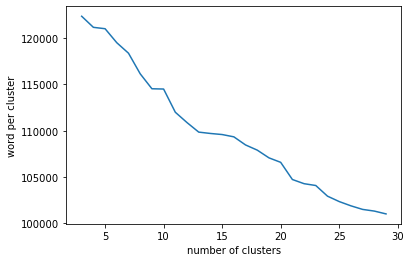

In [91]:
import matplotlib.pyplot as plt
plt.plot(range(3,30),wcss)
plt.xlabel('number of clusters')
plt.ylabel('word per cluster')
plt.show()

In [92]:
true_k=30
Kmeans=KMeans(n_clusters=true_k,init='k-means++',n_init=1)
Kmeans.fit(X)
print("Top terms per cluster:")
order_centroids = Kmeans.cluster_centers_.argsort()[:, ::-1]
terms = cv.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i)
    print("-----------------------")
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
    print()
print("\n")



Top terms per cluster:
Cluster 0:
-----------------------
 athlet
 russia
 olymp
 if
 simpli
 compet
 reform
 rebranded
 still
 sanction

Cluster 1:
-----------------------
 music
 video
 listen
 like
 appl
 love
 song
 album
 year
 stream

Cluster 2:
-----------------------
 like
 sport
 funni
 it
 peopl
 talk
 team
 know
 think
 look

Cluster 3:
-----------------------
 knick
 bmuni
 rtaylor
 traceavp
 seyuan
 catrp
 kice
 godsonrel
 jface
 thelinetwo

Cluster 4:
-----------------------
 sport
 court
 russia
 dope
 arbitr
 reduc
 year
 fouryear
 rule
 russian

Cluster 5:
-----------------------
 team
 short
 funni
 never
 like
 say
 ask
 harri
 httpstcojeubax
 sport

Cluster 6:
-----------------------
 sport
 militari
 bathroom
 elig
 trans
 want
 discours
 join
 funni
 sooooo

Cluster 7:
-----------------------
 case
 court
 must
 maradona
 rule
 bodi
 conserved
 great
 soccer
 argentin

Cluster 8:
-----------------------
 thing
 evermor
 idea
 alway
 httpstcotlsmahdkbi
 connect
 co

In [93]:
i=0
j=0
while i<28:
    while True: 
        Y=cv.transform([new_tweet_df.Tweet_lemmatized[j]])
        prediction=Kmeans.predict(Y)
        if i == prediction:
            print("Tweet of cluster "+str(prediction)+" : "+df.text[i])
            print ("-----------------------------------------------")
            print("\n")
            j=0
            break
        j+=1
    i+=1

Tweet of cluster [0] : @TulsiGabbard the biological essentialism of TERFs is so funny to me, because you apparently vouch for equality, but insist at all moments in time you're inferior and unable to compete with "biological men". maybe you're just not good at sports bro?
-----------------------------------------------


Tweet of cluster [1] : mighty funny how nobody in black sports media is standing with Kyrie. y'all really some jokes https://t.co/Z3QRGrWYpk
-----------------------------------------------


Tweet of cluster [2] : Tht time I was put in a gc full of barstool sports type "funny" accounts who consistently complained people were stealing their jokes and I'm like... by that measure you have beef with the entire audience of the Call Her Daddy podcast idk what to tell u :/
-----------------------------------------------


Tweet of cluster [3] : mighty funny how nobody in black sports media is standing with Kyrie. y'all really some jokes https://t.co/Z3QRGrWYpk
---------------